In [4]:
import tensorflow as tf
import matplotlib as mp
import cv2
from PIL import Image
import os
import numpy as np
from matplotlib import pyplot as plt

In [6]:
data_dir = "data"

In [8]:
image_exts = ['jpeg' , 'png' , 'jpg' , 'bmp']

In [10]:
os.listdir('data')

['happy', 'sad']

In [12]:
data_dir = 'data'
image_exts = ['jpeg' , 'png' , 'jpg' , 'bmp']

def is_valid_image_format(image_path):
    try:
        with Image.open(image_path) as img:
            # Get image format
            img_format = img.format.lower()
            return img_format in image_exts
    except Exception as e:
        print(f'Issue with image {image_path}: {e}')
        return False

for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        try:
            if not is_valid_image_format(image_path):
                print(f'Image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}: {e}')
            # Uncomment the following line if you want to delete the problematic image
            # os.remove(image_path)

In [16]:
batch_size = 32
image_size = (256,256)
data = tf.keras.utils.image_dataset_from_directory(
    'data',
    image_size=image_size,
    batch_size=batch_size)

Found 1601 files belonging to 2 classes.


In [24]:
data_iterator = data.as_numpy_iterator()

In [26]:
batch = data_iterator.next()

In [28]:
images, labels = batch
print(images.shape)
print(labels.shape)

(32, 256, 256, 3)
(32,)


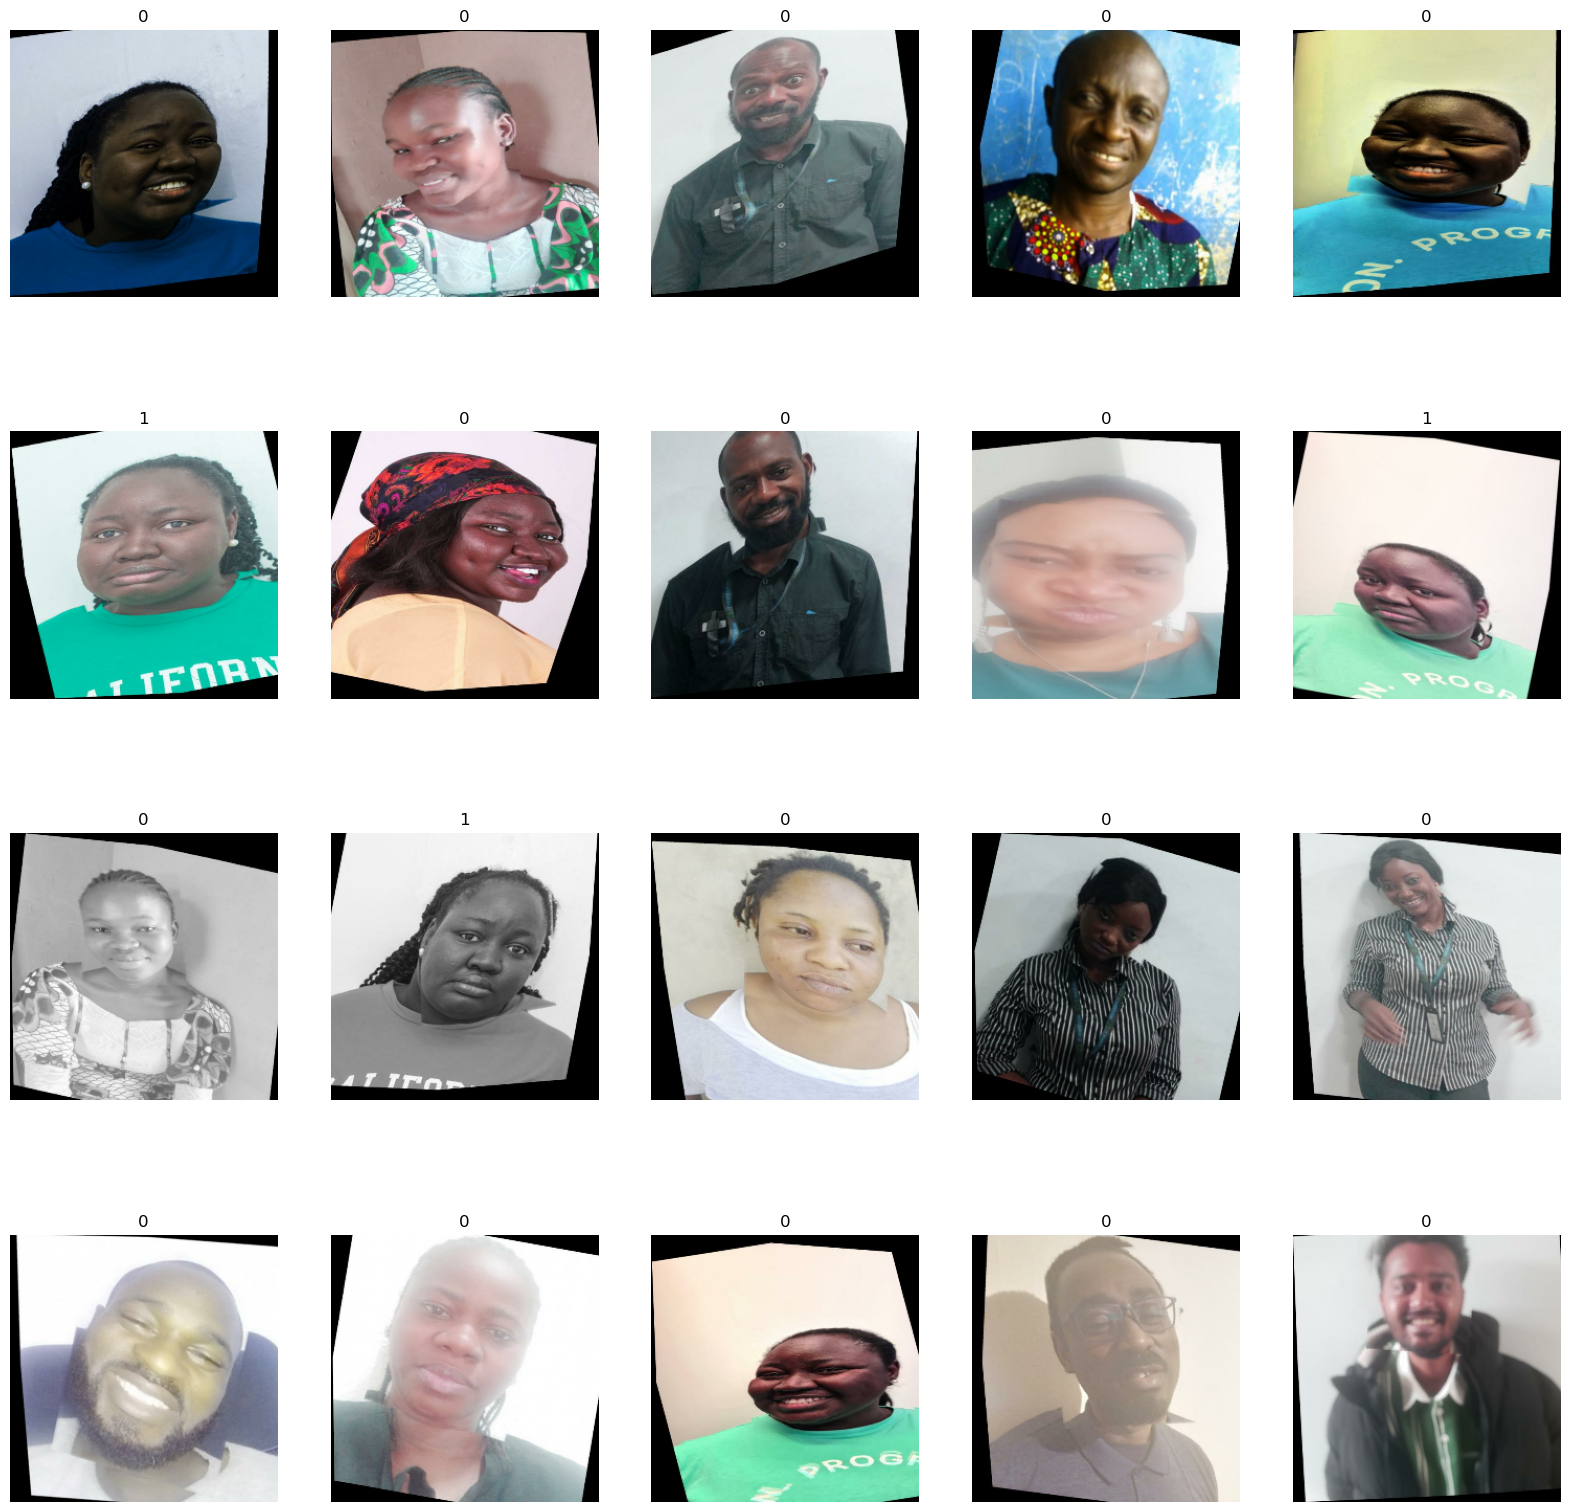

In [30]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:20]):
    ax[idx//5, idx%5].imshow(img.astype(int))
    ax[idx//5, idx%5].title.set_text(batch[1][idx])
    ax[idx//5, idx%5].axis('off')

In [32]:
data = data.map(lambda x,y: (x/255,y))

In [34]:
data.as_numpy_iterator().next()

(array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.0000

In [36]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size =  int(len(data)*.1)

In [58]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

In [44]:
model = Sequential([
    Input(shape=(256, 256, 3)),
    Conv2D(16, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' and adjust units for multi-class classification
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,801,761 (64.09 MB)

 Trainable params: 16,801,537 (64.09 MB)

 Non-trainable params: 224 (896.00 B)

In [48]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [50]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256, 256, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    16,777,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,801,761 (64.09 MB)

 Trainable params: 16,801,537 (64.09 MB)

 Non-trainable params: 224 (896.00 B)

In [52]:
logdir = 'logs'

In [54]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [60]:
hist = model.fit(train,epochs=30,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 55s 1s/step - accuracy: 0.8628 - loss: 3.9537 - val_accuracy: 0.1031 - val_loss: 15.3281
Epoch 2/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9172 - loss: 0.6552 - val_accuracy: 0.2031 - val_loss: 12.4274
Epoch 3/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 46s 1s/step - accuracy: 0.9143 - loss: 1.0588 - val_accuracy: 0.4594 - val_loss: 11.2158
Epoch 4/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9121 - loss: 0.5674 - val_accuracy: 0.1656 - val_loss: 40.7785
Epoch 5/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9481 - loss: 0.1863 - val_accuracy: 0.3969 - val_loss: 21.3875
Epoch 6/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9447 - loss: 0.1622 - val_accuracy: 0.4844 - val_loss: 17.2558
Epoch 7/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.9421 - loss: 0.1133 - val_accuracy: 0.5156 - val_loss: 12.2960
Epoch 8/30
35/35 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.9349 - loss: 0.1462 - val_accuracy: 0.2562 - va

In [62]:
from tensorflow.keras.models import load_model

In [64]:
# Save the model in Keras format
model.save('my_model.keras')